# Skin Lesion Challenge Starting Kit

In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

%matplotlib inline

In the data folder you can find 4 [CSV](https://fr.wikipedia.org/wiki/Comma-separated_values) files and a folder name im cointining 1000 images of skin accompanied by the 1000 segmentation images. The first CSV file is train.csv, it contains the name of the image with the class of each image. You can read it with [pandas](https://pandas.pydata.org/) as follow :

In [2]:
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
X = X_df.values
y = y_df.values

In [3]:
labels_counts_df = df.groupby('Malignant').count()
labels_counts_df = labels_counts_df.rename(columns={'Malignant': 'count'})
labels_counts_df

,ImageId
Malignant,
0,418
1,282


You can open and display the images in the following way.

Name of the image IM_000521, class of the image 0 and type of the image object <class 'numpy.ndarray'>


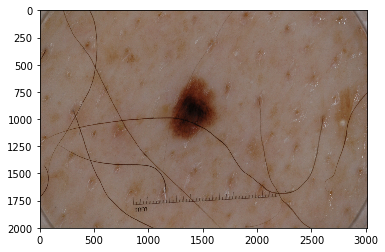

In [4]:
filename = 'data/im/{}.jpg'.format(X[0])
image = imread(filename)
print('Name of the image {0}, class of the image {1} and type of the image object {2}'.format(X[0],y[0],type(image)))
plt.imshow(image)
plt.show()

You can found the corresponding segmentation image by adding '_Segmentation' at the ID of the image. Otherwise the ImageName.csv file contain the corresponding name.

Text(0.5,1,'Image with mask')

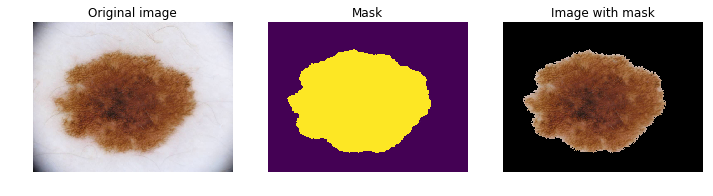

In [5]:
name_im = X[1]
filename = 'data/im/{}.jpg'.format(name_im)
image = imread(filename)
filename_Segmentation = 'data/im/{}_segmentation.jpg'.format(name_im)
image_Segmentation = imread(filename_Segmentation) # Value 0 or 255
image_Segmentation_boolean = (image_Segmentation/255).astype(np.uint8) # To get uint8
image_Segmentation_expand = np.expand_dims(image_Segmentation_boolean, axis=2)
image_mul_mask = (image_Segmentation_expand*image) 

fig = plt.figure(figsize=(12, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols = (1, 3),
                axes_pad = 0.5)
grid[0].imshow(image)
grid[0].axis('off')
grid[0].set_title("Original image")
grid[1].imshow(image_Segmentation)
grid[1].axis('off')
grid[1].set_title("Mask")
grid[2].imshow(image_mul_mask)
grid[2].axis('off')
grid[2].set_title("Image with mask")

In [6]:
df_ImageName = pd.read_csv('data/ImageName.csv')
print(df_ImageName.head(3))
corresponding_Image = df_ImageName[df_ImageName['ImageId']==X[2]]['ImageSegId'].values[0]
print('The corresponding segmentation image of {0} is {1}.'.format(X[2],corresponding_Image))

     ImageId              ImageSegId
0  IM_000521  IM_000521_segmentation
1  IM_000737  IM_000737_segmentation
2  IM_000740  IM_000740_segmentation
The corresponding segmentation image of IM_000740 is IM_000740_segmentation.


The test.csv is the file containing the ID of the test set. You can read it as the other CSV files. The Malignant column is empty. You have to fill it with an integerequal to 0 or 1 : the answer of your binary classifier.

In [7]:
df_submission = pd.read_csv('data/test.csv')
print(df_submission.head(3))

     ImageId  Malignant
0  IM_000788        NaN
1  IM_000640        NaN
2  IM_000889        NaN


Example to fill the file and save it.

In [8]:
import random # Not necessity for you
for Id in df_submission['ImageId']:
    value = random.randint(0,1) # Draw a random number between 0 and 1 : binary classification : put here the result of
                                # your classifier
    df_submission.loc[df_submission['ImageId'] == Id, 'Malignant'] = value
df_submission['Malignant'] = df_submission['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(df_submission.head(3))
df_submission.to_csv('data/exemple_test.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          0
1  IM_000640          1
2  IM_000889          0


## Useful functions
Here we resize the images to different resolutions, to do it you can use [resize](http://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=size#skimage.transform.resize) and [rescale](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rescale) functions from [scikit-image](http://scikit-image.org/).

C:\Users\ASUS\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


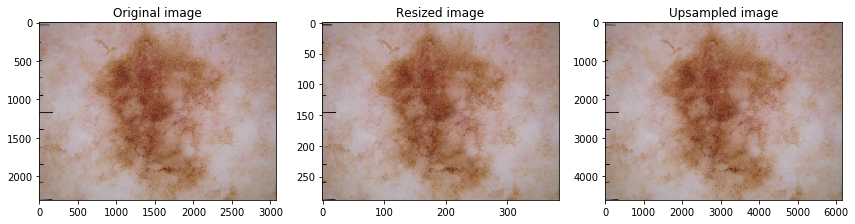

In [9]:
# If you need it
name_im = X[2]
filename = 'data/im/{}.jpg'.format(name_im)
image = imread(filename)
(h,w,c) = image.shape
h_div_by_8 = int(h/8)
w_div_by_8 = int(w/8)
image_downsampled = resize(image,(h_div_by_8,w_div_by_8), mode='reflect')
h_mul_by_2 = int(h*2)
w_mul_by_2 = int(w*2)
image_interpolated = resize(image,(h_mul_by_2,w_mul_by_2), mode='reflect')

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 12))

grid = axes.ravel()

grid[0].imshow(image,interpolation='nearest')
grid[0].set_title("Original image")
grid[1].imshow(image_downsampled,interpolation='nearest')
grid[1].set_title("Resized image")
grid[2].imshow(image_interpolated,interpolation='nearest')
grid[2].set_title("Upsampled image")
plt.tight_layout()